<h1 style="font-size:3rem;color:orange;">Homework 5</h1>

# Problem 1

### Problem 1 In this problem you will compare the performance of a variety of classifiers that you have learned about so far. The data is in the file magic04.data and the column names are in the file magic04.names. The last column is a categorical response with values g or h, and the rest of the columns are numerical features. You can read more about the dataset here.

#### (a) Load the data (can use the pandas function read table with the arguments sep=’,’ and header=None). Split the data into a training and test set. Scale and center the columns using the mean and standard deviation of each column from the training set (make sure you use the same scaling on the test set that is used on the training set).

In [1]:
#%% Step 1- imports data into dataframe
import pandas as pa;
import timeit;

col_names=['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pa.read_table('C:/Users/danma/Downloads/magic04.data', sep=',', header=None, names=col_names)
print(df.head())

    fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g  


In [2]:
#%% Step 2 - splits data into x and y

from sklearn.model_selection import train_test_split as TTS

x = df.filter(regex='f')
y = df.filter(regex='class')
#repace categorical data characters with 1 and 0, 1 to separate from 0
y = y.replace('g',1, regex=True)
y = y.replace('h',0, regex=True)
#turns y into a 1-d array instead of a dataframe column
y = y.to_numpy()
y = y.ravel()
y = y.astype('int')

#splits into training and test data
TS = 0.25 #for tuning
print("Test Size = ", TS, "\n")
x_train, x_test, y_train, y_test = TTS(x,y,test_size=TS, random_state=42)

del df, col_names, TS

Test Size =  0.25 



In [3]:
#%% Step 3 - scale and center columns

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scalar.fit(x_train)

x_train = scalar.transform(x_train)
x_test = scalar.transform(x_test)

del scalar

#To tune hyperparameters for each model, you can either use cross-validation or hand-tune by examining
#the model performance for reasonable values of the hyper-parameters.
from sklearn.model_selection import GridSearchCV
# Apply your models to the test set. Report the accuracy, visualize an ROC curve, and report the AUC
#for each model. For Logistic Regression, Random Forests, and Gradient Boosted Decision Trees, report
#the most meaningful predictors.
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import RocCurveDisplay

#### (b) Learn the following models to classify the training data: <br>• Logistic Regression: Can import LogisticRegression from sklearn.linear model.<br>• LDA: Can import LinearDiscriminantAnalysis from sklearn.discriminant analysis.<br>• KNN Classifier: Need to choose the number of neighbors k.<br>• Linear SVM: Need to choose the margin penalty C as a hyperparameter.<br>• Gaussian (Radial) SVM: Need to choose the margin penalty C and the radius width γ.<br><br>To tune hyperparameters for each model, you can either use cross-validation or hand-tune by examining the model performance for reasonable values of the hyper-parameters.

In [4]:
#%% Step 4 - Logistic Regression
print("Logistic Regression Results:")
from sklearn.linear_model import LogisticRegression
import numpy as np
#%% Step 4.1 Tuning Hyperparameters - Did not provide change in accuracy nor auc

# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,10),
    'solver'  : ['liblinear', 'saga']
}
#Create new reg object
logregtest = LogisticRegression(max_iter=5000)
#use gridsearch
grid = GridSearchCV(logregtest, param_grid = parameters, cv=10, scoring='accuracy', verbose=1, n_jobs=-1)
best_logreg = grid.fit(x, y)

print('Best penalty:', best_logreg.best_estimator_.get_params()['penalty'])
print('Best C:', best_logreg.best_estimator_.get_params()['C'])
print('Best multi_class:', best_logreg.best_estimator_.get_params()['multi_class'])
print('Best solver:', best_logreg.best_estimator_.get_params()['solver'])

#fit the model
logreg = LogisticRegression(penalty=best_logreg.best_estimator_.get_params()['penalty'], 
                            C=best_logreg.best_estimator_.get_params()['C'], 
                            multi_class=best_logreg.best_estimator_.get_params()['multi_class'],
                           solver=best_logreg.best_estimator_.get_params()['solver'])
logreg.fit(x_train, y_train)

Logistic Regression Results:
Fitting 10 folds for each of 40 candidates, totalling 400 fits
Best penalty: l1
Best C: 10.0
Best multi_class: auto
Best solver: liblinear


LogisticRegression(C=10.0, penalty='l1', solver='liblinear')

In [5]:
#%% Step 5 - LDA
print("Linear Discriminant Analysis Results:")
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#%% Step 5.1 Tune Hyperparameters for LDA
parameters = {
    'solver'  : ['svd', 'lsqr', 'eigen']  
}
#Create new reg object
ldatest = LinearDiscriminantAnalysis()
#use gridsearch
grid = GridSearchCV(ldatest, param_grid = parameters, cv=10, scoring='accuracy', verbose=2, n_jobs=-1)
best_lda = grid.fit(x, y)

print('Best solver:', best_lda.best_estimator_.get_params()['solver'])

#%%
#fit the model
lda = LinearDiscriminantAnalysis(solver=best_lda.best_estimator_.get_params()['solver'])
lda.fit(x_train, y_train)

Linear Discriminant Analysis Results:
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Best solver: svd


LinearDiscriminantAnalysis()

In [6]:
#%% Step 6 - KNN Classifier
print("KNN Classifier Results:")
from sklearn.neighbors import KNeighborsClassifier

#%% Step 6.1 Tune Hyperparameters for KNN
parameters = {
    'n_neighbors'  : list(range(1,30)),
    'leaf_size' : list(range(1,50)),
    'p' : [1,2]
}
#Create new reg object
knntest = KNeighborsClassifier()
#use gridsearch
grid = GridSearchCV(knntest, param_grid = parameters, cv=10, scoring='accuracy', verbose=2, n_jobs=-1)
best_knn = grid.fit(x, y)

print('Best n_neighbors:', best_knn.best_estimator_.get_params()['n_neighbors'])
print('Best leaf_size:', best_knn.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_knn.best_estimator_.get_params()['p'])

#fit the model
neigh = KNeighborsClassifier(n_neighbors=best_knn.best_estimator_.get_params()['n_neighbors'],
                            leaf_size=best_knn.best_estimator_.get_params()['leaf_size'],
                            p=best_knn.best_estimator_.get_params()['p'])
neigh.fit(x_train, y_train)

KNN Classifier Results:
Fitting 10 folds for each of 2842 candidates, totalling 28420 fits
Best n_neighbors: 12
Best leaf_size: 1
Best p: 1


KNeighborsClassifier(leaf_size=1, n_neighbors=12, p=1)

In [7]:
#%% Step 7 - Linear SVM
print("Linear SVM Results:")
from sklearn.svm import SVC

#Step 7.1 - Tune Hyperparameters for Linear SVM
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
             } 

#Need to choose the margin penalty C as a hyperparameter
#Create new reg object
lsvmtest = SVC(kernel='linear')
#use gridsearch
grid = GridSearchCV(lsvmtest, param_grid = parameters, cv=10, scoring='accuracy', verbose=2, n_jobs=-1)
best_lsvm = grid.fit(x, y)

print('Best C:', best_lsvm.best_estimator_.get_params()['C'])

#fit the model
lin_svm = SVC(C=best_lsvm.best_estimator_.get_params()['C'],
              kernel='linear')
lin_svm.fit(x_train,y_train)

Linear SVM Results:
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Best C: 0.1


SVC(C=0.1, kernel='linear')

In [10]:
#%% Step 8 - Gaussian SVM
print("Gaussian SVM Results:")
from sklearn.svm import SVC

#Step 8.1 - Tune Hyperparameters for Gaussian SVM
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
             } 

#Need to choose the margin penalty C and the radius width γ.
#Create new reg object
gsvmtest = SVC(kernel='rbf')
#use gridsearch
grid = GridSearchCV(gsvmtest, param_grid = parameters, cv=10, scoring='accuracy', verbose=2, n_jobs=-1)
best_gsvm = grid.fit(x, y)

print('Best C:', best_gsvm.best_estimator_.get_params()['C'])
print('Best gamma:', best_gsvm.best_estimator_.get_params()['gamma'])


#fit the model
gau_svm = SVC(kernel='rbf',
              C = best_gsvm.best_estimator_.get_params()['C'],
              gamma = best_gsvm.best_estimator_.get_params()['gamma'])
gau_svm.fit(x_train,y_train)

Gaussian SVM Results:
Fitting 10 folds for each of 35 candidates, totalling 350 fits
Best C: 1000
Best gamma: 0.0001


SVC(C=1000, gamma=0.0001)

#### (c) Apply your models to the test set. Report the accuracy, visualize an ROC curve, and report the AUC for each model. For Logistic Regression, report the most meaningful predictors.

Logistic Regression Results:
Accuracy: 0.791


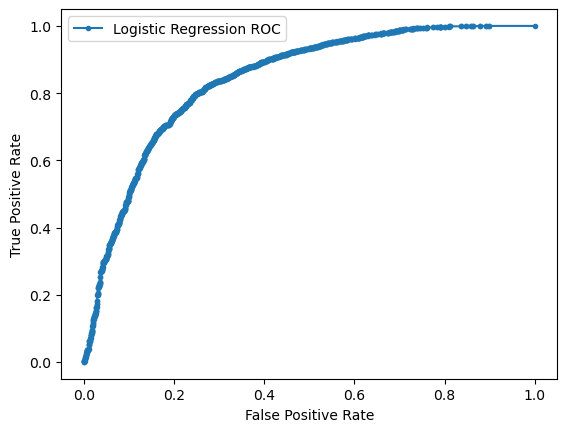

AUC: 0.841

Linear Discriminant Analysis Results:
Accuracy: 0.787


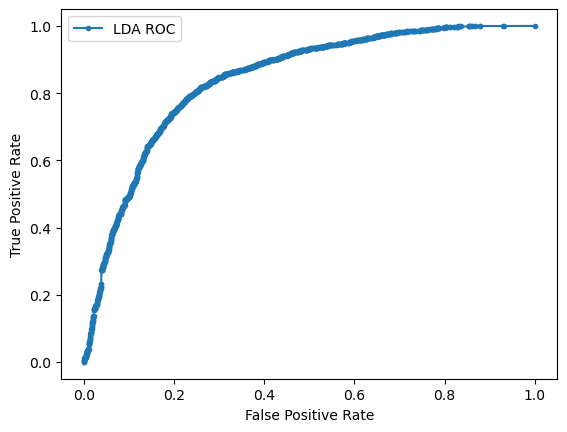

AUC: 0.841

KNN Classifier Results:


C:\Users\danma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.842


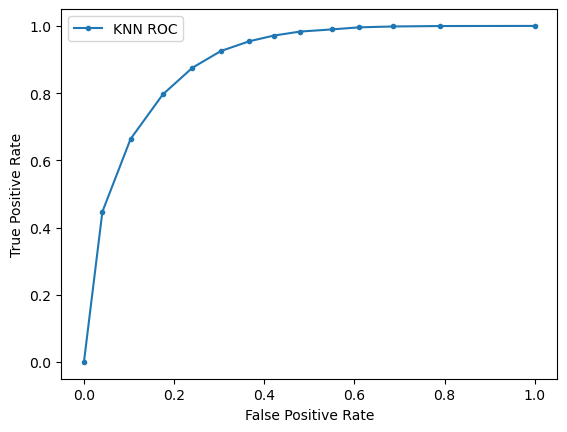

AUC: 0.895

Linear SVM Results:
Accuracy: 0.792


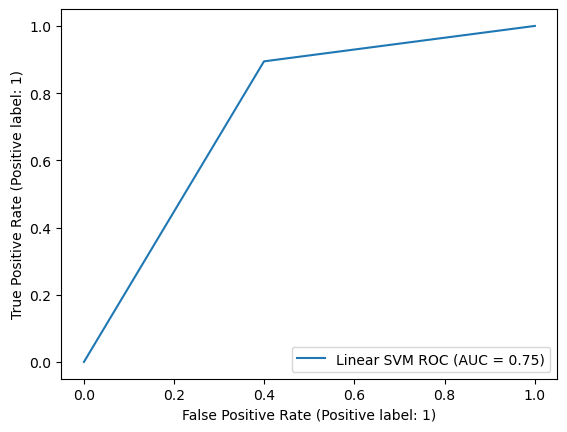

AUC: 0.748 

Gaussian SVM Results:
Accuracy: 0.820


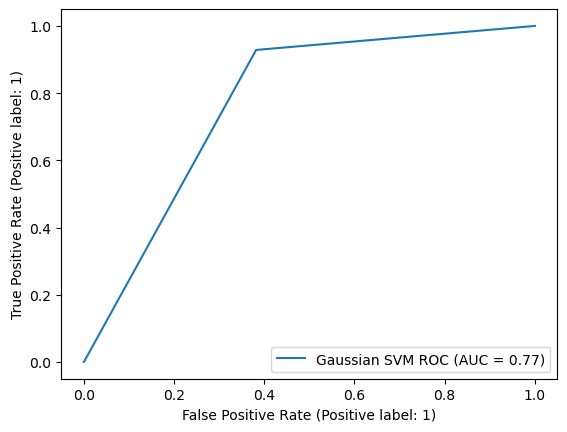

AUC: 0.773 



In [11]:
print("Logistic Regression Results:")
# predict probabilities
logreg_pred = logreg.predict_proba(x_test)
# keep probabilities for the positive outcome only
logreg_pred = logreg_pred[:, 1]

#print accuracy of the model
print("Accuracy: %.3f" %logreg.score(x_test, y_test))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, logreg_pred)
pyplot.plot(fpr, tpr, marker='.', label='Logistic Regression ROC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# calculate AUC
auc = roc_auc_score(y_test, logreg_pred)
print('AUC: %.3f\n' % auc)

del logreg_pred, fpr, tpr, thresholds, auc

print("Linear Discriminant Analysis Results:")
#predict probabilities
lda_pred = lda.predict_proba(x_test)
# keep probabilities for the positive outcome only
lda_pred = lda_pred[:, 1]
#print accuracy of the model
print("Accuracy: %.3f" %lda.score(x_test, y_test))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, lda_pred)
pyplot.plot(fpr, tpr, marker='.', label='LDA ROC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# calculate AUC
auc = roc_auc_score(y_test, lda_pred)
print('AUC: %.3f\n' % auc)

del lda_pred, fpr, tpr, thresholds, auc

print("KNN Classifier Results:")
#predict probabilities
neigh_pred = neigh.predict_proba(x_test)
# keep probabilities for the positive outcome only
neigh_pred = neigh_pred[:, 1]
#print accuracy of the model
print("Accuracy: %.3f" %neigh.score(x_test, y_test))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, neigh_pred)
pyplot.plot(fpr, tpr, marker='.', label='KNN ROC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# calculate AUC
auc = roc_auc_score(y_test, neigh_pred)
print('AUC: %.3f\n' % auc)

#Need to choose the number of neighbors k
del neigh_pred, fpr, tpr, thresholds, auc

print("Linear SVM Results:")
#predict probabilities
lin_svm_y_pred = lin_svm.predict(x_test)

#print accuracy of the model
print("Accuracy: %0.3f" %lin_svm.score(x_test, y_test))

#roc curve
svc_disp = RocCurveDisplay.from_predictions(y_test, lin_svm_y_pred, name="Linear SVM ROC")
pyplot.show()

from sklearn import metrics

#auc score
fpr, tpr, threshold = metrics.roc_curve(y_test, lin_svm_y_pred)
score = metrics.auc(fpr, tpr)
print("AUC: %0.3f \n" %score)

del lin_svm_y_pred, svc_disp, fpr, tpr, threshold

print("Gaussian SVM Results:")
#predict probabilities
gau_svm_y_pred = gau_svm.predict(x_test)

#print accuracy of the model
print("Accuracy: %0.3f" %gau_svm.score(x_test, y_test))

#roc curve
svc_disp = RocCurveDisplay.from_predictions(y_test, gau_svm_y_pred, name="Gaussian SVM ROC")
pyplot.show()

#auc score
fpr, tpr, threshold = metrics.roc_curve(y_test, gau_svm_y_pred)
score = metrics.roc_auc_score(y_test, gau_svm_y_pred)
print("AUC: %0.3f \n" %score)

del gau_svm_y_pred, score, svc_disp, fpr, tpr, threshold

Plotting Feature Importance:
fLength Score: 1.24222
fWidth Score: 0.14540
fSize Score: 0.30319
fConc Score: 0.00412
fConc1 Score: 0.63790
fAsym Score: 0.02138
fM3Long Score: 0.36736
fM3Trans Score: 0.01101
fAlpha Score: 1.15690
fDist Score: 0.03267


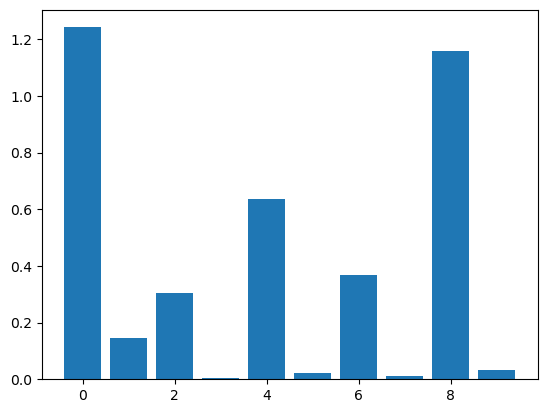

In [14]:
# Get Importance
importance = logreg.coef_[0]
print("Plotting Feature Importance:")
colnames = list(x.columns)
# summarize feature importance
for i,v in enumerate(importance):
	print(colnames[i],'Score: %.5f' % (abs((v))))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], abs(importance))
pyplot.show()